In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, roc_curve, auc
from sklearn.datasets import make_classification
%config IPCompleter.greedy=True
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize': (12, 6)})

In [3]:
df = pd.read_csv("../files/telecom_churn.csv")

In [4]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
# 1. Признаки по одному  1.1 Количественные

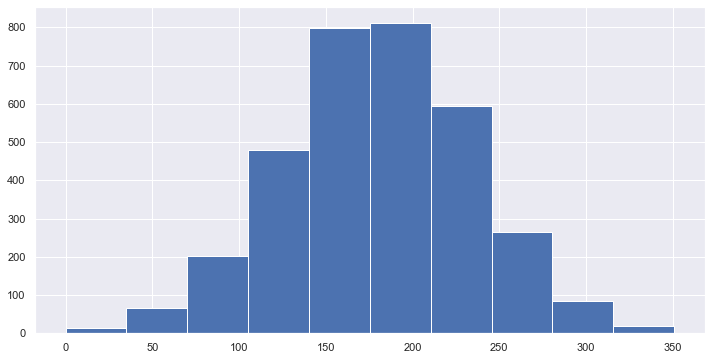

In [6]:
df["Total day minutes"].hist();

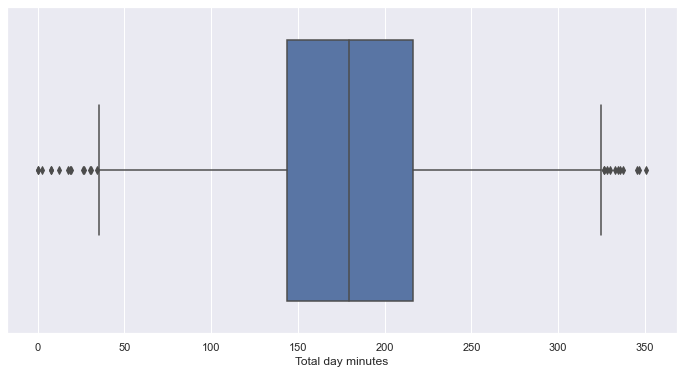

In [7]:
sns.boxplot(df["Total day minutes"]);

<AxesSubplot:xlabel='Total day minutes'>

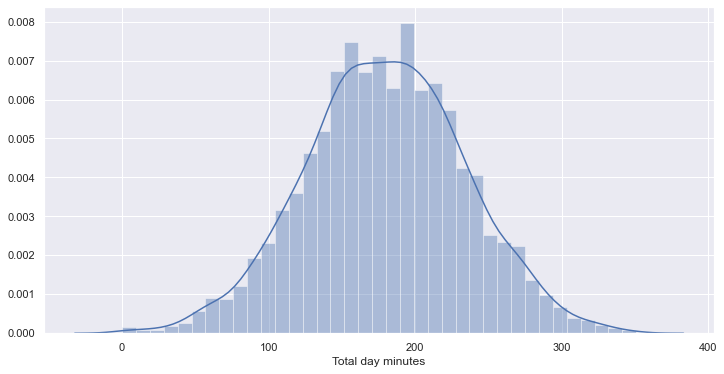

In [8]:
sns.distplot(df["Total day minutes"])

In [9]:
# df.hist(); - общая гиста, почему то с ошибкой работает. Анлаогия ко всему верхнему - describe, quantile.

In [10]:
# 1.2 Категориальные

In [11]:
df["State"].value_counts().head()

WV    106
MN     84
NY     83
AL     80
OR     78
Name: State, dtype: int64

In [12]:
df["Churn"].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

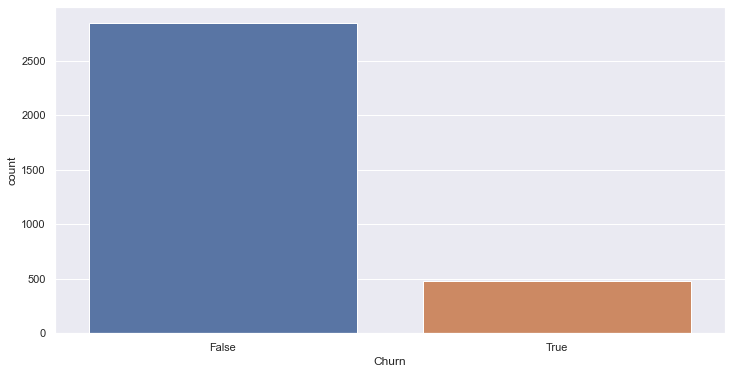

In [13]:
sns.countplot(df["Churn"])

<AxesSubplot:xlabel='State', ylabel='count'>

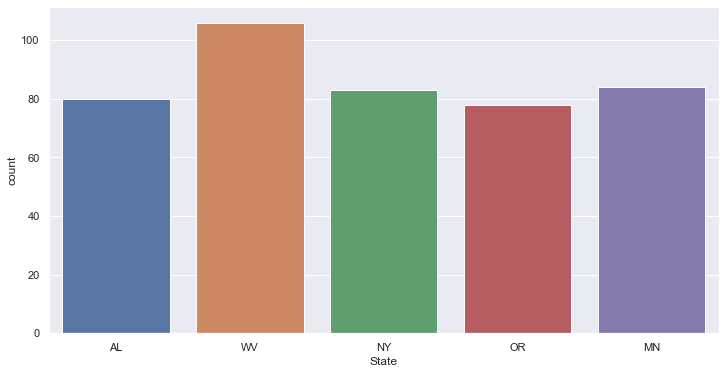

In [14]:
sns.countplot(df[df["State"].isin(df["State"].value_counts().head().index)]["State"])

In [15]:
# Взадимодействия       2.1 Колич - Колич

In [16]:
feat = [f for f in df.columns if "charge" in f]
# df[feat].hist();

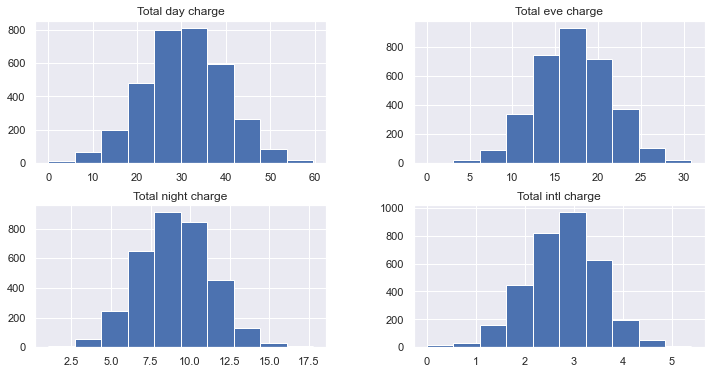

In [17]:
df.filter(like="charge").hist();

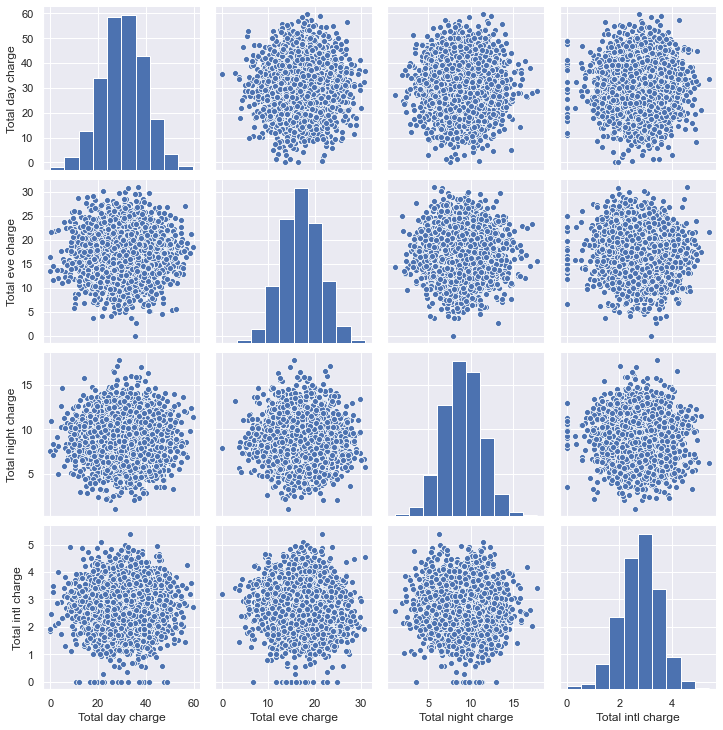

In [18]:
sns.pairplot(df[feat]);

Text(0, 0.5, 'Межнар. начисления')

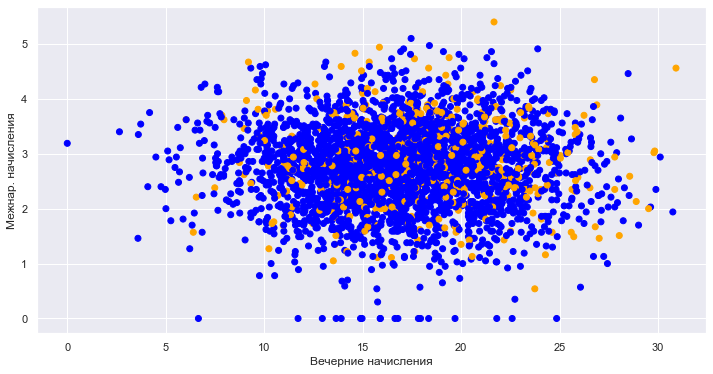

In [19]:
plt.scatter(df["Total eve charge"], df["Total intl charge"],
           color=df["Churn"].map({False: "blue", True: "orange"}))
plt.xlabel("Вечерние начисления")
plt.ylabel("Межнар. начисления")

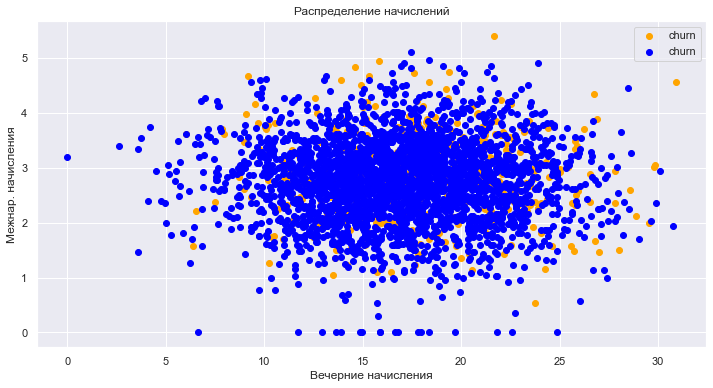

In [20]:
plt.scatter(df[df["Churn"]]["Total eve charge"], df[df["Churn"]]["Total intl charge"],
           color="orange", label="churn");
plt.scatter(df[~df["Churn"]]["Total eve charge"], df[~df["Churn"]]["Total intl charge"],
           color="blue", label="churn");
plt.xlabel("Вечерние начисления");
plt.ylabel("Межнар. начисления");
plt.title("Распределение начислений");
plt.legend();

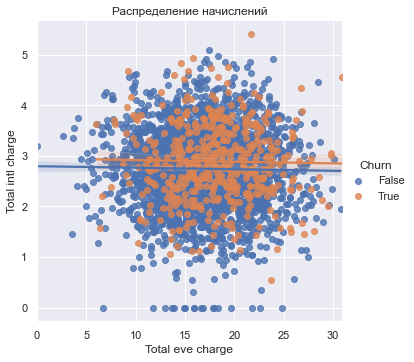

In [21]:
sns.lmplot(x="Total eve charge", y="Total intl charge", data=df, hue="Churn");
plt.title("Распределение начислений");

<AxesSubplot:>

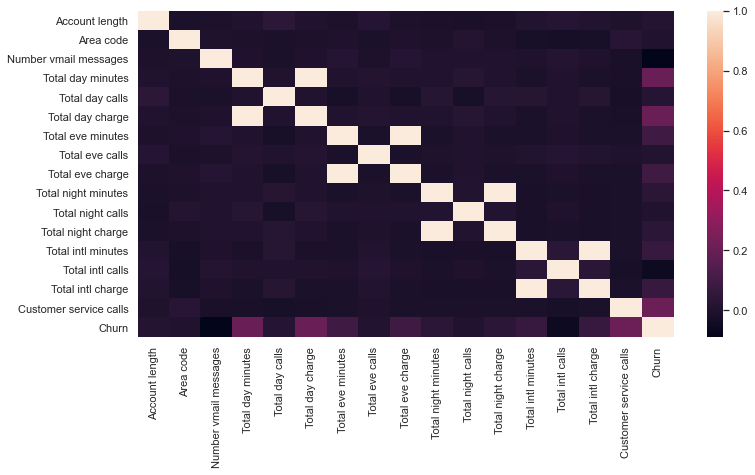

In [22]:
sns.heatmap(df.corr())

In [23]:
# 2.2 Колич - категор(бинарн)

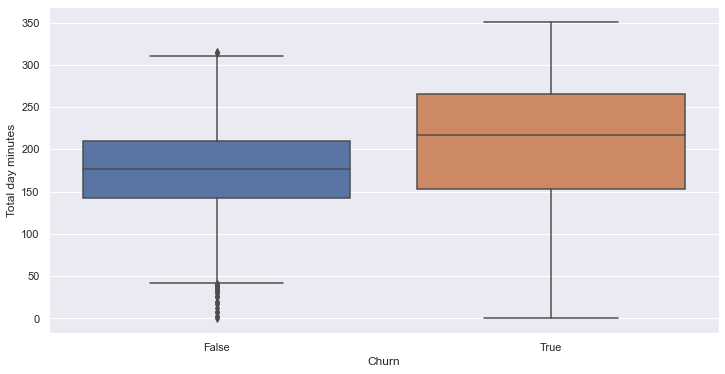

In [24]:
sns.boxplot(x="Churn", y="Total day minutes", data=df);

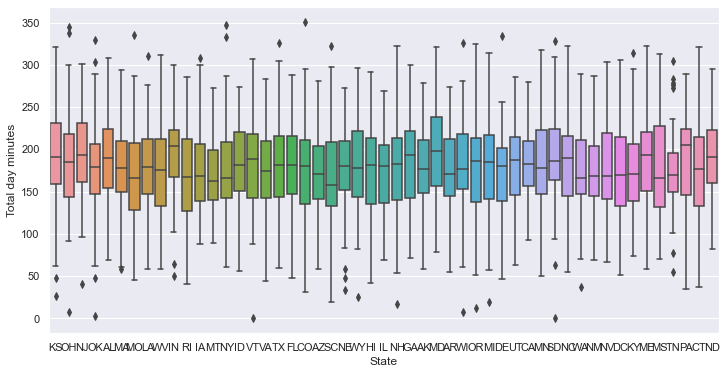

In [25]:
sns.boxplot(x="State", y="Total day minutes", data=df);

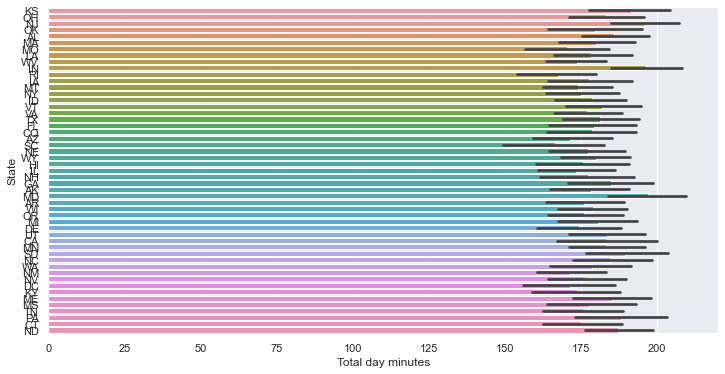

In [26]:
sns.barplot(y="State", x="Total day minutes", data=df);

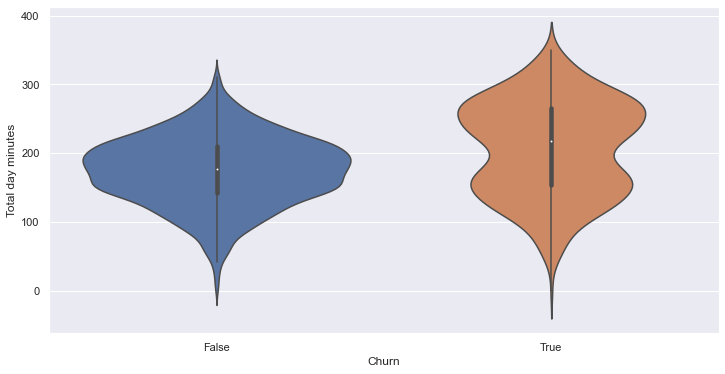

In [27]:
sns.violinplot(x="Churn", y="Total day minutes", data=df);

In [28]:
df.groupby("International plan")["Total day minutes"].median()

International plan
No     179.0
Yes    188.9
Name: Total day minutes, dtype: float64

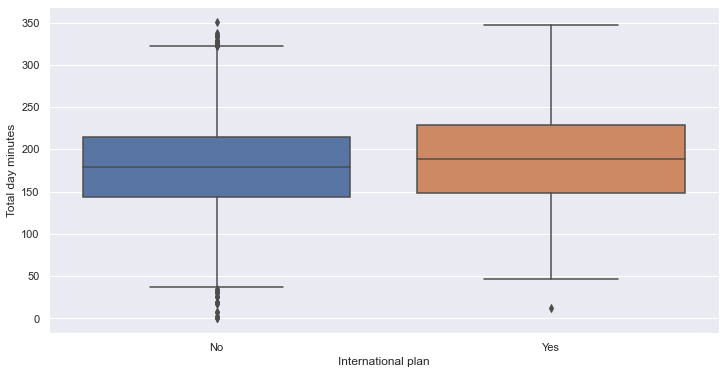

In [29]:
sns.boxplot(x="International plan", y="Total day minutes", data=df);

In [30]:
# 2.3 катег-катег

In [31]:
pd.crosstab(df["Churn"], df["International plan"])

International plan,No,Yes
Churn,,
False,2664,186
True,346,137


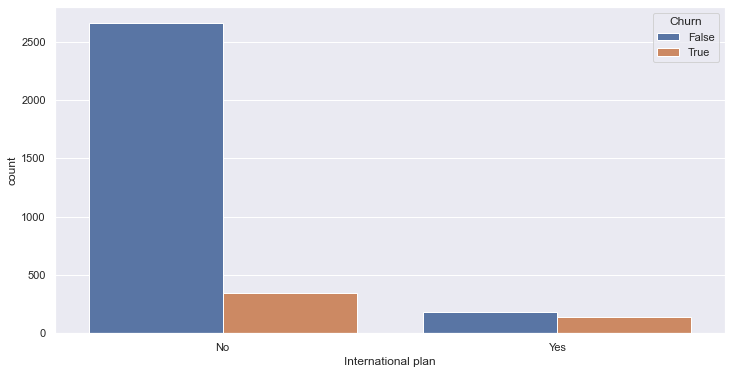

In [32]:
sns.countplot(x="International plan", hue="Churn", data=df);

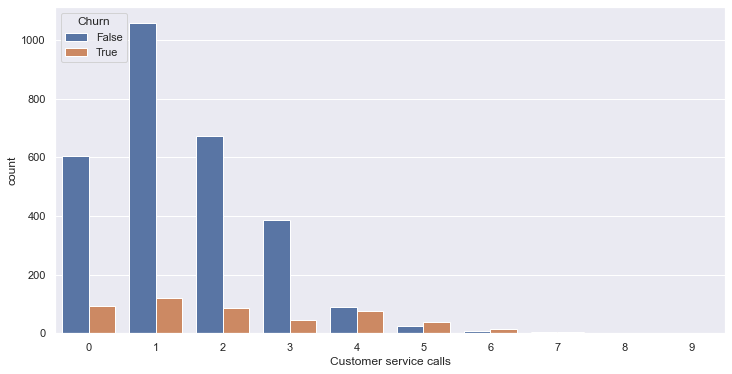

In [33]:
sns.countplot(x="Customer service calls", hue="Churn", data=df);

In [34]:
df2 = df.drop("State", axis=1)

In [35]:
df2["International plan"] = df2["International plan"].map({"Yes": 1, "No": 0})
df2["Voice mail plan"] = df2["Voice mail plan"].map({"Yes": 1, "No": 0})

In [36]:
df2.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [37]:
tsne = TSNE(random_state=0)

In [38]:
# tsne.fit(df2)

In [39]:
# plt.scatter(tsne.embedding_[:, 0], tsne.embedding_[:, 1])

In [40]:
# plt.scatter(tsne.embedding_[df2["Churn"].values, 0],
#             tsne.embedding_[df2["Churn"].values, 1], color="orange")
# plt.scatter(tsne.embedding_[~df2["Churn"].values, 0],
#             tsne.embedding_[~df2["Churn"].values, 1], color="blue")

In [41]:
################################### фишки из письменной лекции ###########################################

In [42]:
df = pd.read_csv("../files/Video_Games_Sales.csv")

In [43]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [45]:
df = df.dropna()

In [46]:
df['User_Score'] = df.User_Score.astype('float64')
df['Year_of_Release'] = df.Year_of_Release.astype('int64')
df['User_Count'] = df.User_Count.astype('int64')
df['Critic_Count'] = df.Critic_Count.astype('int64')

In [47]:
sales_df = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]

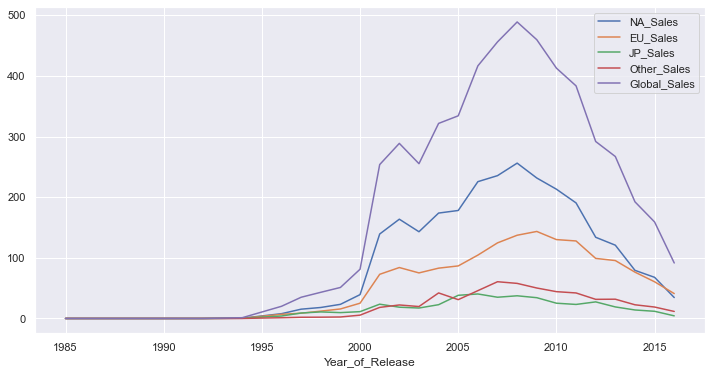

In [48]:
sales_df.groupby("Year_of_Release").sum().plot();

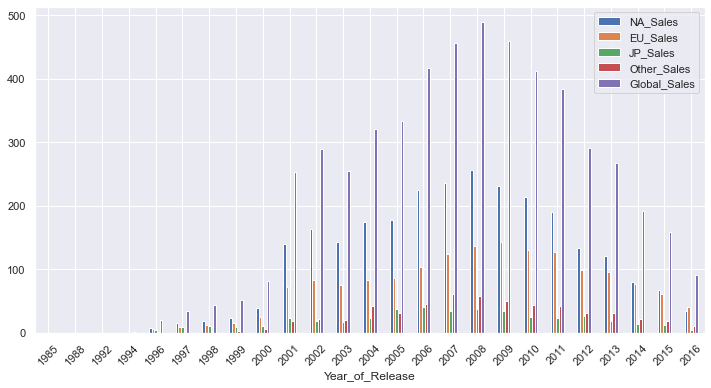

In [49]:
sales_df.groupby('Year_of_Release').sum().plot(kind='bar', rot=45);

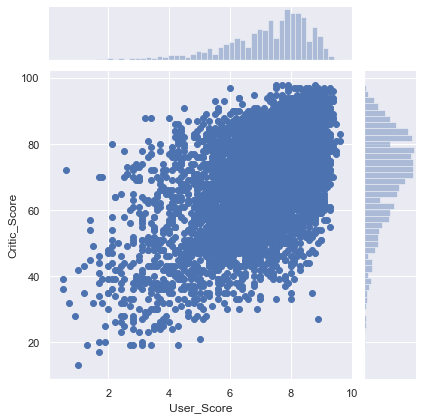

In [50]:
sns.jointplot(x="User_Score", y="Critic_Score", data=df);

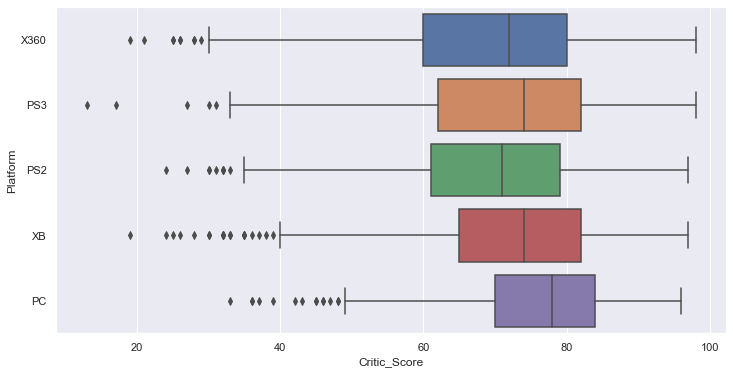

In [51]:
top_platforms = df.Platform.value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(y="Platform", x="Critic_Score", data=df[df.Platform.isin(top_platforms)]);

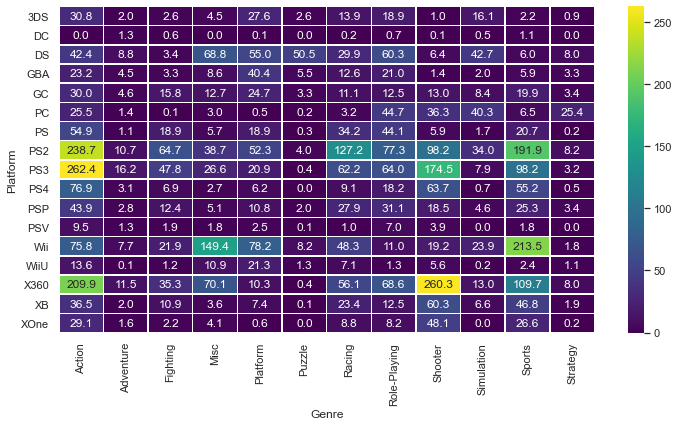

In [52]:
platform_genre_sales = df.pivot_table(
                        index='Platform', 
                        columns='Genre', 
                        values='Global_Sales', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5, cmap="viridis");

In [53]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)
# посчитаем число вышедших игр и проданных копий по годам
years_df = df.groupby('Year_of_Release')[['Global_Sales']].sum().join(
    df.groupby('Year_of_Release')[['Name']].count()
)
years_df.columns = ['Global_Sales', 'Number_of_Games']

# создаем линию для числа проданных копий
trace0 = go.Scatter(
    x=years_df.index,
    y=years_df.Global_Sales,
    name='Global Sales'
)

# создаем линию для числа вышедших игр 
trace1 = go.Scatter(
    x=years_df.index,
    y=years_df.Number_of_Games,
    name='Number of games released'
)

# определяем массив данных и задаем title графика в layout
data = [trace0, trace1]
layout = {'title': 'Statistics of video games'}

# cоздаем объект Figure и визуализируем его
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [54]:
# создаем Box trace для каждого жанра из наших данных
data = []
for genre in df.Genre.unique():
    data.append(
        go.Box(y=df[df.Genre==genre].Critic_Score, name=genre)
    )

# визуализируем данные
iplot(data, show_link = False)

In [55]:
# считаем число проданных и вышедших игр по платформам
platforms_df = df.groupby('Platform')[['Global_Sales']].sum().join(
    df.groupby('Platform')[['Name']].count()
)
platforms_df.columns = ['Global_Sales', 'Number_of_Games']
platforms_df.sort_values('Global_Sales', ascending=False, inplace=True)

# создаем traces для визуализации
trace0 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.Global_Sales,
    name='Global Sales'
)

trace1 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.Number_of_Games,
    name='Number of games released'
)

# создаем массив с данными и задаем title для графика и оси x в layout
data = [trace0, trace1]
layout = {'title': 'Share of platforms', 'xaxis': {'title': 'platform'}}

# создаем объект Figure и визуализируем его
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [56]:
############################################ homework #################################################

In [57]:
df = pd.read_csv("https://raw.githubusercontent.com/EugeneKalentev/mlcourse/master/howpop_train.csv")

In [58]:
df = df.drop(df.filter(like="_lognorm"), axis=1)

In [59]:
df['published'] = pd.to_datetime(df.published, yearfirst = True)

In [60]:
df["year"] = df.published.dt.year
df["hour"] = df.published.dt.hour
df["month"] = df.published.dt.month
df["day"] = df.published.dt.day
df['dayofweek'] = [d.isoweekday() for d in df.published] # 1 - monday
df['weekday'] = [d.weekday() for d in df.published]  # poxodu 1 - saturday like in america 
# df['year'] = [d.year for d in df.published]
# df['month'] = [d.month for d in df.published]
# df['dayofweek'] = [d.isoweekday() for d in df.published]
# df['hour'] = [d.hour for d in df.published]

In [61]:
df.head()

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,hour,month,day,dayofweek,weekday
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,2008,18,1,1,2,1
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,2008,18,1,1,2,1
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,2008,18,1,1,2,1
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,2008,1,1,2,3,2
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,2008,14,1,2,3,2


In [62]:
df["day"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

<AxesSubplot:>

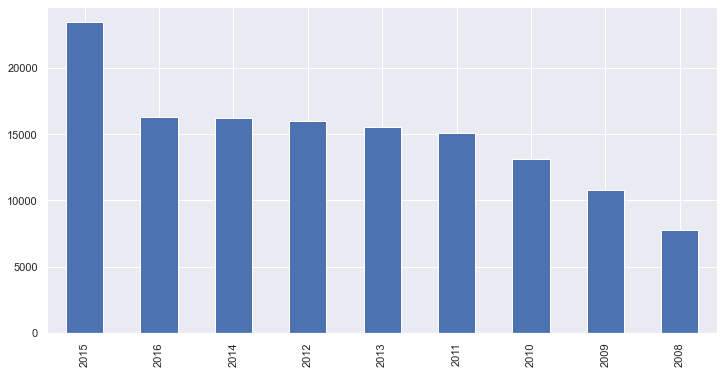

In [63]:
df["year"].value_counts().plot(kind="bar")

<AxesSubplot:>

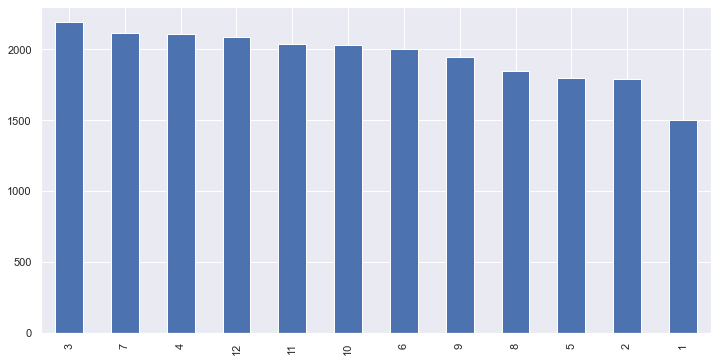

In [64]:
df[df["year"] == 2015]["month"].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='year', ylabel='count'>

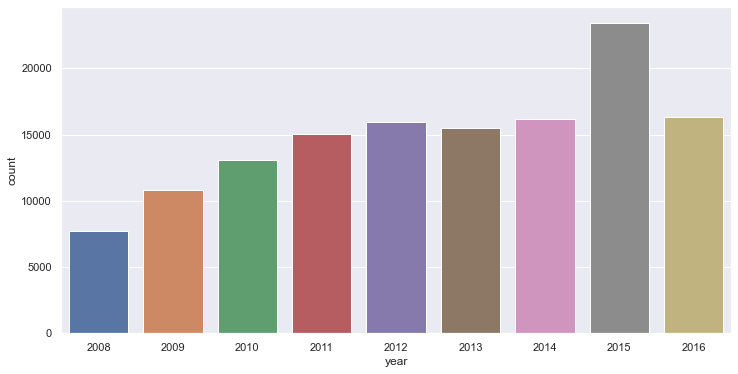

In [65]:
sns.countplot(df["year"])

<AxesSubplot:xlabel='month', ylabel='count'>

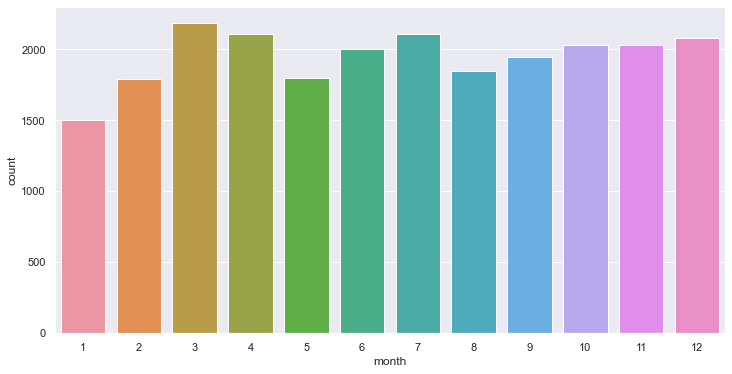

In [66]:
sns.countplot(df[df["year"] == 2015]["month"])

<AxesSubplot:xlabel='day', ylabel='count'>

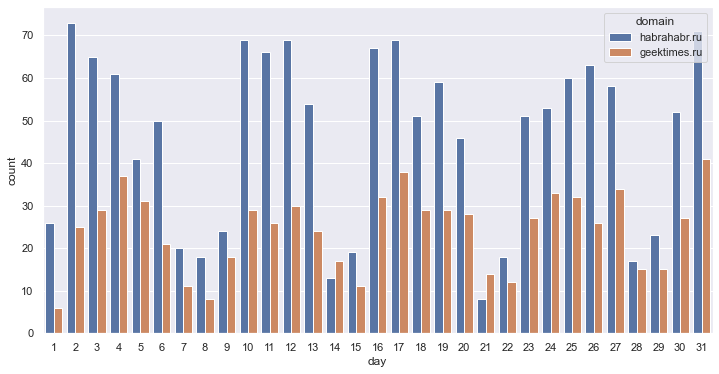

In [67]:
sns.countplot(df[(df["year"] == 2015) & (df["month"] == 3)]["day"], hue=df["domain"])

<AxesSubplot:xlabel='dayofweek', ylabel='count'>

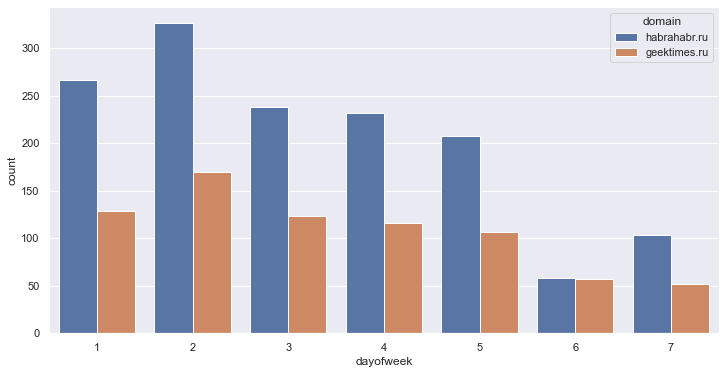

In [68]:
sns.countplot(df[(df["year"] == 2015) & (df["month"] == 3)]["dayofweek"], hue=df["domain"])

<AxesSubplot:xlabel='day', ylabel='count'>

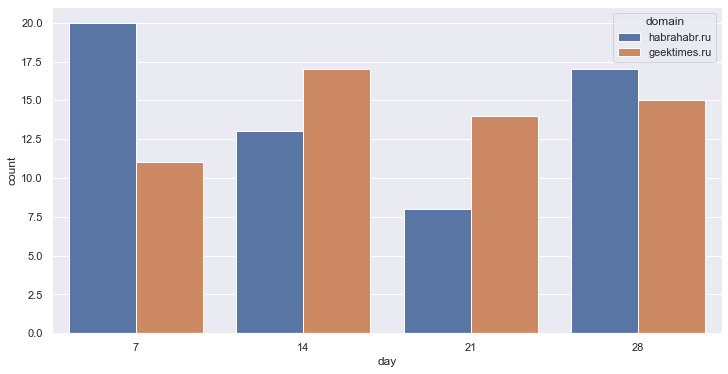

In [69]:
sns.countplot(df[(df["year"] == 2015) & (df["month"] == 3) &
                 (df["dayofweek"] == 6)]["day"], hue = df["domain"])

<AxesSubplot:xlabel='hour', ylabel='comments'>

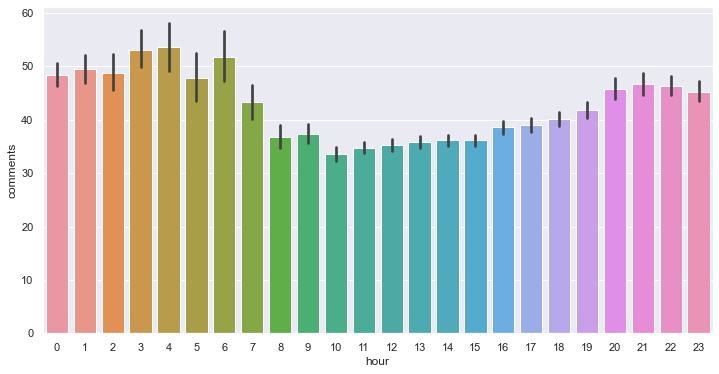

In [70]:
sns.barplot(x="hour", y="comments", data=df)

In [71]:
df[df["comments"] == df["comments"].max()]

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,hour,month,day,dayofweek,weekday
38763,https://geektimes.ru/post/123157/,geektimes.ru,123157,2011-07-01 02:35:00,@Dottore,NaN,False,2158,Как раздавать инвайты на Google+,2266,24,15300,226.0,55.0,2011,2,7,1,5,4


<AxesSubplot:xlabel='hour', ylabel='views'>

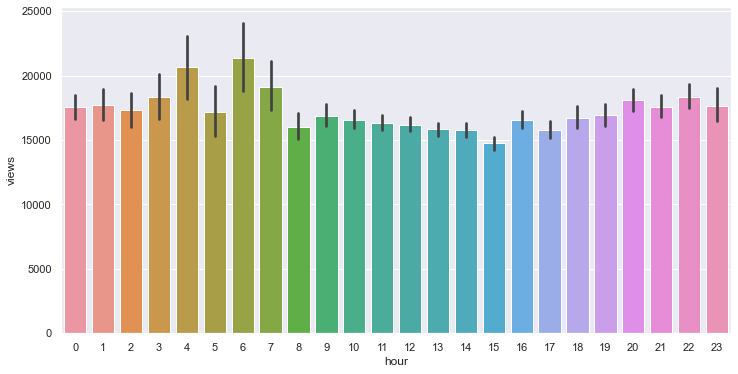

In [72]:
sns.barplot(x="hour", y="views", data=df)

In [73]:
df["author"].nunique()

22077

c:\users\danil\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning:

FixedFormatter should only be used together with FixedLocator



<AxesSubplot:xlabel='author'>

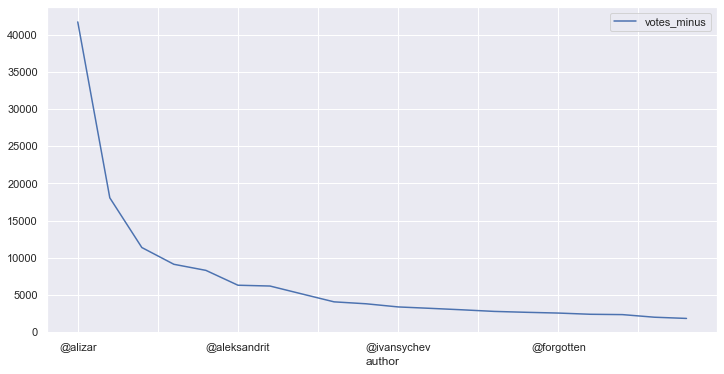

In [74]:
df.groupby("author")[["votes_minus"]].sum().sort_values("votes_minus", ascending=False).head(20).plot()

In [75]:
authors = df.groupby("author")[["post_id"]].count().sort_values("post_id", ascending=False) \
                                    .head(20).index.values;

In [76]:
df2 = df[(df["author"].isin(authors)) & (df["votes_minus"] > df["votes_plus"])] \
                .groupby("author", as_index=False)[["post_id"]].count() \
                .sort_values("post_id", ascending=False).head(5)

<AxesSubplot:xlabel='post_id', ylabel='author'>

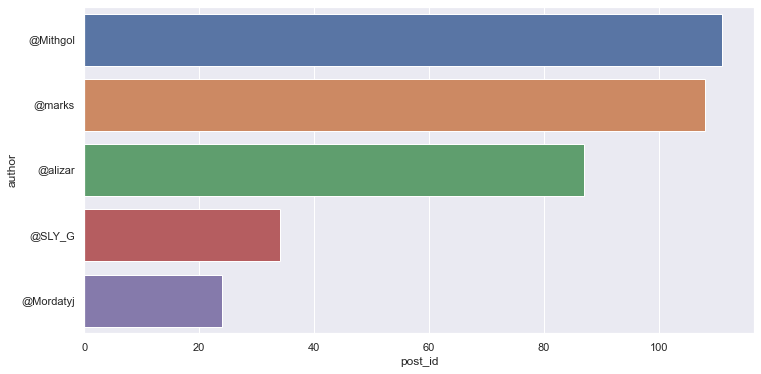

In [78]:
sns.barplot(x=df2["post_id"], y=df2["author"])

In [ ]:
df2 = df[(df["dayofweek"] == 1) | (df["dayofweek"] == 6)]

In [ ]:
sns.countplot(df2["hour"], hue=df2["dayofweek"])

In [ ]:
############# SNS Plots #################
# 1. Количественные:
# hist, boxplot, distplotm kdeplot
# 2. Категориальные:
# countplot
# 3. Взаимодействие Колич - Колич:
# pairplot, scatter, lmplot, corr(heatmap), lineplot, jointplot(scatter+hist)
# 4. Взаимодействие Категор - Колич:
# boxplot, barplot, violinplot, plot, plot().barh()
# 5. Взаимодействие Категор - Категор:
# countplot(hue)